# 1. Carga de datos y EDA inicial
- Cargar CSV original
- Número de filas y columnas
- Existencia de duplicados
- Tipos de variables
- Valores nulos por columna

In [30]:
# Core

import requests
import pandas as pd
# Configuración para que muestre todas las columnas al completo
pd.set_option('display.max_columns', None)
# Configuración para que no muestre la notación científica
# pd.set_option('display.float_format', '{:,.0f}'.format)

import numpy as np
import re

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)
sns.set_palette("Set2")

plt.rcParams["axes.titlesize"] = 16
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12

# Configuración

import warnings
warnings.filterwarnings("ignore")

# Utilidades

# para convertir str en números
from word2number import w2n

In [4]:

def carga_eda(csv):
    """ 
    Función para leer csv, convertir a df y hacer una primera exploración.
    Igualar a variable con el nombre que quieres dar a DataFrame
    """
    
    try:
        # Convertir el csv a DataFrame
        df = pd.read_csv(f"../data/{csv}.csv")        

        # Muestro las primeras filas
        display(df.head())

        # Muestro las últimas filas
        display(df.tail())

        # Muestro las dimensiones del dataframe
        print(f"-----\n\nEl DataFrame tiene {df.shape[0]} filas y {df.shape[1]} columnas.\n-----")

        # Consulto si hay filas duplicadas
        print(f"\nEl número de filas duplicadas es {df.duplicated().sum()}\n-----")

        # Muestro el tipo de dato y si hay nulos por cada columna
        print("\nInformación del DataFrame:")
        df.info()

        # Muestro el porcentaje de nulos por variable
        print("\nPorcentaje de nulos:")
        display(round(df.isnull().mean() * 100, 2))

        # Muestro las estadísticas de columnas numéricas
        print("-----\n\nEstadísticas descriptivas:")
        display(df.describe(include="all").T)

        # Me devuelve un df que tendré que igualar a una variable
        return df  
                

    # Excepciones en caso de no encontrar el archivo o de que haya un error
    except FileNotFoundError:
        print(f"Error: No se encontró el archivo '../data/{csv}.csv'.")
        return None  
    
    except Exception as e:
        print(f"Error: {e}")
        return None 

In [5]:
df_movies = carga_eda("raw_movies_dataset")

,Title,Genre,Year,Budget,Revenue,IMDB_Rating
0,The Last Journey,Drama,2020,11000000,3.404969e+07,4.9
1,Infinite Dreams,Drama,2004,178000000,5.504360e+08,6.6
2,Code of Shadows,Romance,2018,13000000,7.855773e+06,4.7
3,Ocean Whisper,Action,2016,148000000,1.769979e+08,7.2
4,Forgotten Realm,Romance,2017,61000000,1.264061e+08,NaN


,Title,Genre,Year,Budget,Revenue,IMDB_Rating
17,Shattered Skies,NaN,2008,59000000,2.180626e+08,6.7
18,Eternal Voyage,Fantasy,2022,59000000,NaN,5.8
19,Mystic River,NaN,2020,41000000,5.851030e+07,4.9
20,The Last Journey,Drama,2020,11000000,3.404969e+07,4.9
21,Shattered Skies,NaN,2008,59000000,2.180626e+08,6.7


-----

El DataFrame tiene 22 filas y 6 columnas.
-----

El número de filas duplicadas es 2
-----

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        22 non-null     object 
 1   Genre        18 non-null     object 
 2   Year         22 non-null     object 
 3   Budget       22 non-null     object 
 4   Revenue      19 non-null     float64
 5   IMDB_Rating  18 non-null     float64
dtypes: float64(2), object(4)
memory usage: 1.2+ KB

Porcentaje de nulos:


Title           0.00
Genre          18.18
Year            0.00
Budget          0.00
Revenue        13.64
IMDB_Rating    18.18
dtype: float64

-----

Estadísticas descriptivas:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Title,22,20,The Last Journey,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genre,18,7,Drama,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,22,15,2020,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Budget,22,19,59000000,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Revenue,19.0,NaN,NaN,NaN,173447915.703216,136688546.729653,7855773.484432,59656929.564439,150236576.310303,221459088.660491,550436004.927962
IMDB_Rating,18.0,NaN,NaN,NaN,5.883333,1.487299,3.9,4.9,5.55,6.7,9.1


## 1.1 Visualizaciones exploratorias
- Distribucion de Year (histplot)
- Distribución de Genre (countplot)
- Dsitribución de IMDB_Ratings (histplot)
- Tendencias en Budget (boxplot)
- Tendencias en Revenue (boxplot)
- Relación entre Budget-Revenue (scatterplot)


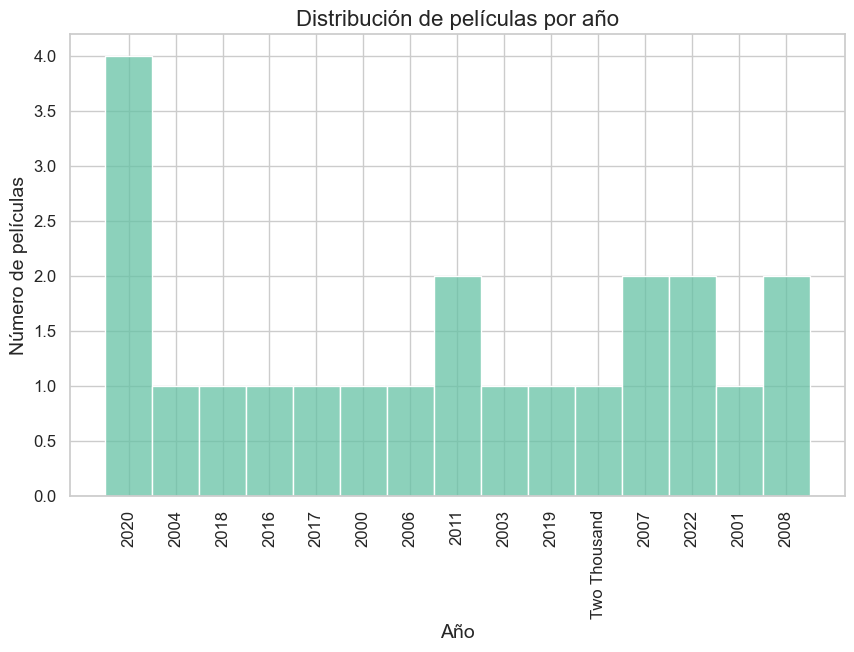

In [40]:
sns.histplot(df_movies["Year"], kde=False)
plt.title("Distribución de películas por año")
plt.xlabel("Año")
plt.ylabel("Número de películas")
plt.xticks(rotation=90)
plt.savefig("../images/histplot_years.png", dpi=300, bbox_inches="tight")
plt.show()

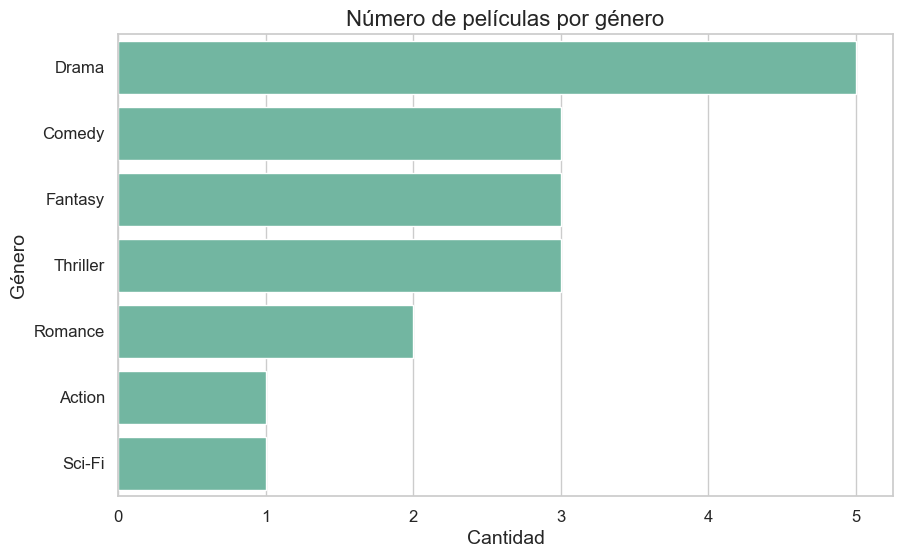

In [38]:
sns.countplot(y=df_movies["Genre"], order=df_movies["Genre"].value_counts().index)
plt.title("Número de películas por género")
plt.xlabel("Cantidad")
plt.ylabel("Género")
plt.savefig("../images/countplot_genre.png", dpi=300, bbox_inches="tight")
plt.show()


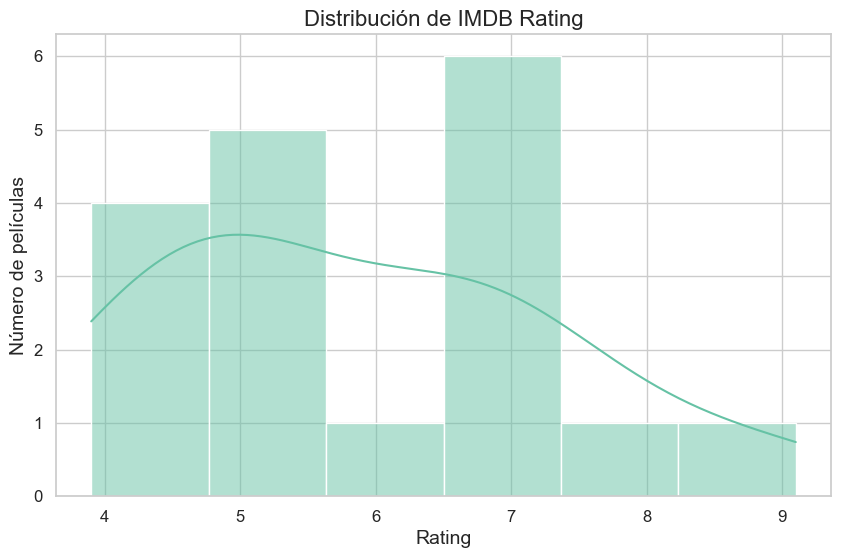

In [39]:
sns.histplot(df_movies["IMDB_Rating"], kde=True)
plt.title("Distribución de IMDB Rating")
plt.xlabel("Rating")
plt.ylabel("Número de películas")
plt.savefig("../images/histplot_ratings.png", dpi=300, bbox_inches="tight")
plt.show()

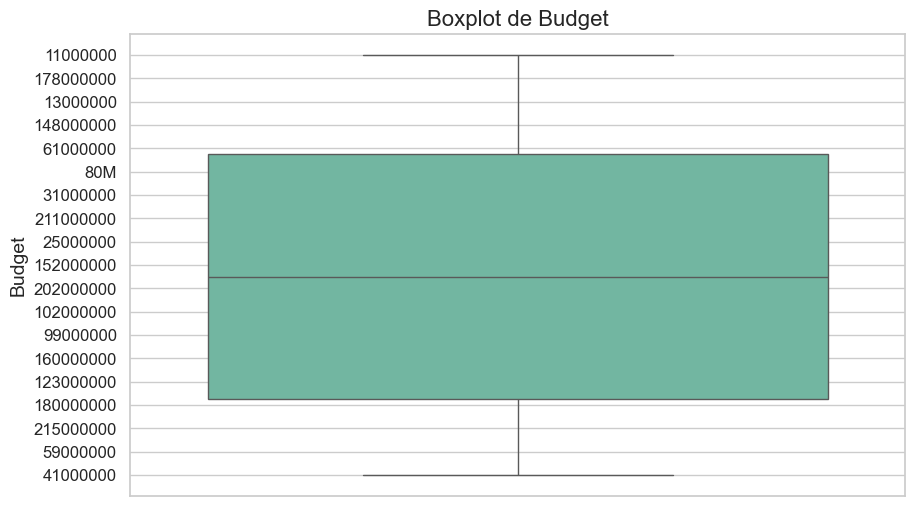

In [41]:
sns.boxplot(y=df_movies["Budget"])
plt.title("Boxplot de Budget")
plt.ylabel("Budget")
plt.savefig("../images/boxplot_budget.png", dpi=300, bbox_inches="tight")
plt.show()

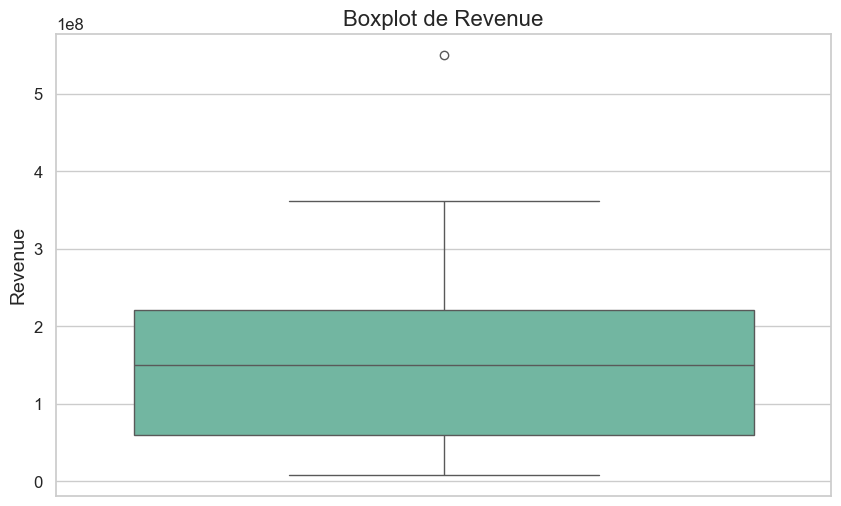

In [42]:
sns.boxplot(y=df_movies["Revenue"])
plt.title("Boxplot de Revenue")
plt.ylabel("Revenue")
plt.savefig("../images/boxplot_revenue.png", dpi=300, bbox_inches="tight")
plt.show()

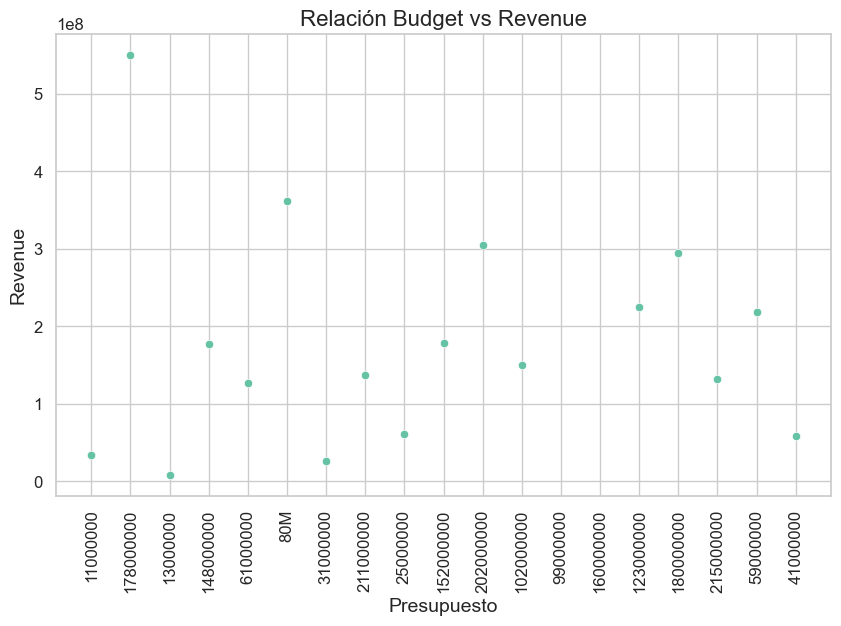

In [43]:
sns.scatterplot(data=df_movies, x="Budget", y="Revenue")
plt.title("Relación Budget vs Revenue")
plt.xlabel("Presupuesto")
plt.ylabel("Revenue")
plt.xticks(rotation=90)
plt.savefig("../images/scatter_budget_revenue.png", dpi=300, bbox_inches="tight")
plt.show()